# Import All Neccessary Library

In [23]:
import time
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Machine Learning Models & Tools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Clustering Evaluation Metrics
from sklearn.metrics import (
    silhouette_score,
    silhouette_samples,
    davies_bouldin_score,
    pairwise_distances_argmin_min
)


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Import Dataset

In [46]:
dataset_studentTypes = "C:/Users/Jia Xuan/Downloads/fyp-linked-github/fyp_Degree/student_performance.csv"
df3 = pd.read_csv(dataset_studentTypes)

# Data Understanding

In [47]:
useless_cols = ['Resources','LearningStyle','OnlineCourses','Discussions','ExamScore','FinalGrade']

df3 = df3.drop(columns=useless_cols)

## Dataset Overview

In [48]:
df3.head()

,StudyHours,Attendance,Extracurricular,Motivation,Internet,Gender,Age,AssignmentCompletion,EduTech,StressLevel
0,19,64,0,0,1,0,19,59,0,1
1,19,64,0,0,1,0,23,90,0,1
2,19,64,0,0,1,0,28,67,1,1
3,19,64,1,0,1,0,19,59,0,1
4,19,64,1,0,1,0,23,90,0,1


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Extracurricular       14003 non-null  int64
 3   Motivation            14003 non-null  int64
 4   Internet              14003 non-null  int64
 5   Gender                14003 non-null  int64
 6   Age                   14003 non-null  int64
 7   AssignmentCompletion  14003 non-null  int64
 8   EduTech               14003 non-null  int64
 9   StressLevel           14003 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


In [50]:
df3.describe()

,StudyHours,Attendance,Extracurricular,Motivation,Internet,Gender,Age,AssignmentCompletion,EduTech,StressLevel
count,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000
mean,19.987431,80.194316,0.594158,0.905806,0.925516,0.551953,23.532172,74.502535,0.709062,1.304363
std,5.890637,11.472181,0.491072,0.695896,0.262566,0.497311,3.514293,14.632177,0.454211,0.785383
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,0.000000,0.000000,1.000000,0.000000,20.000000,62.000000,0.000000,1.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,24.000000,74.000000,1.000000,2.000000
75%,24.000000,90.000000,1.000000,1.000000,1.000000,1.000000,27.000000,87.000000,1.000000,2.000000
max,44.000000,100.000000,1.000000,2.000000,1.000000,1.000000,29.000000,100.000000,1.000000,2.000000


In [51]:
numerical_cols = df3.select_dtypes(include=np.number).columns
categorical_cols = df3.select_dtypes(include=["object", "bool"]).columns

## Distribution Analysis for Numerical Features

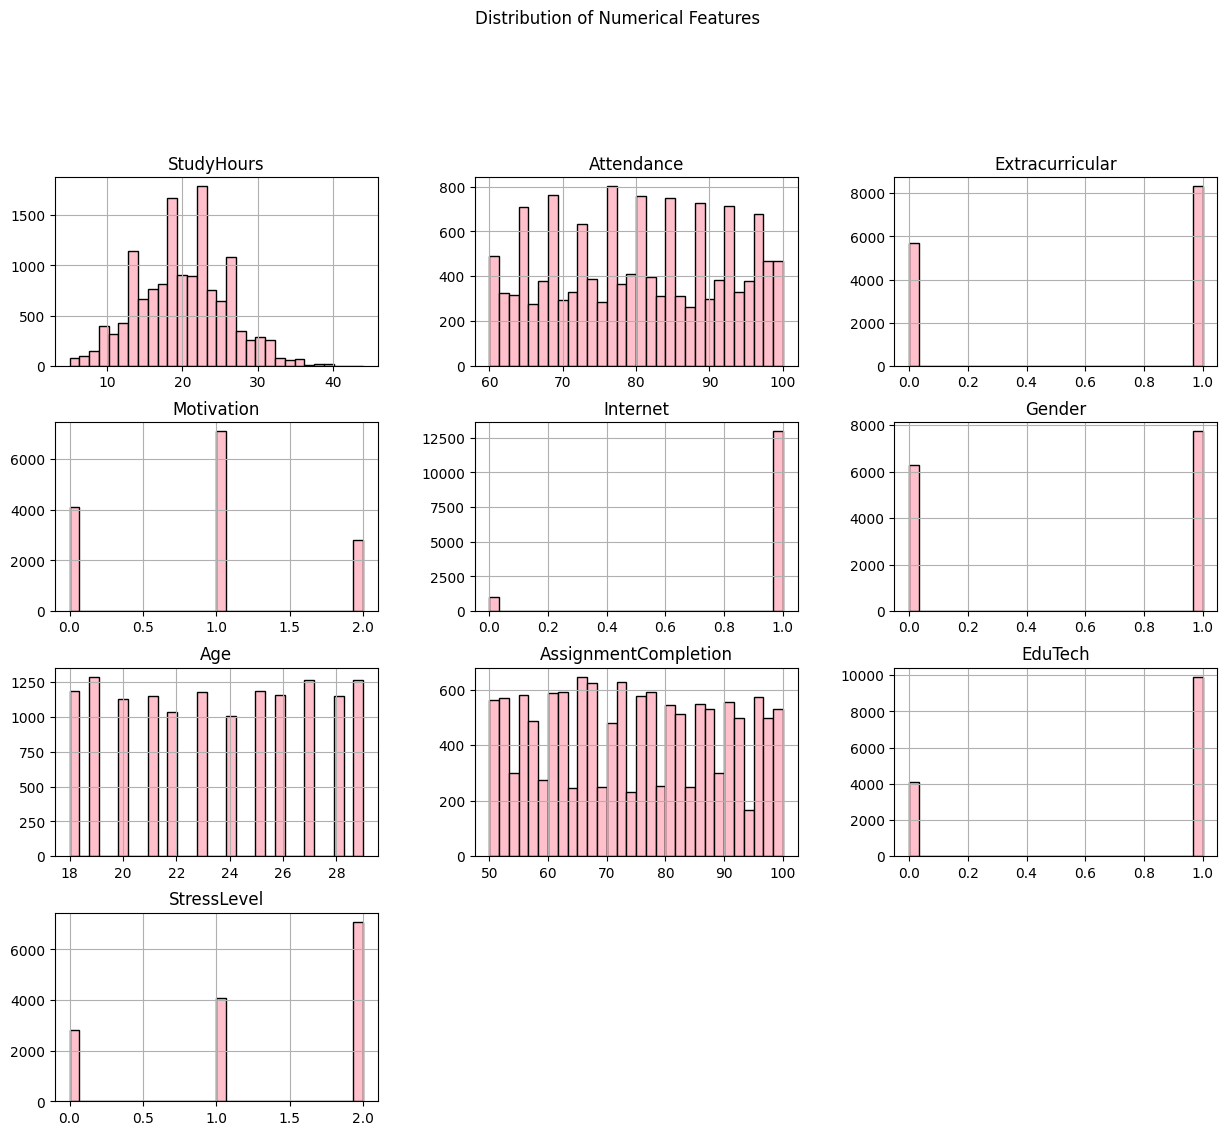

In [52]:
df3[numerical_cols].hist(
    figsize=(15, 12),
    bins=30,
    color='pink',
    edgecolor='black'
)

plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


## Correlation Analysis

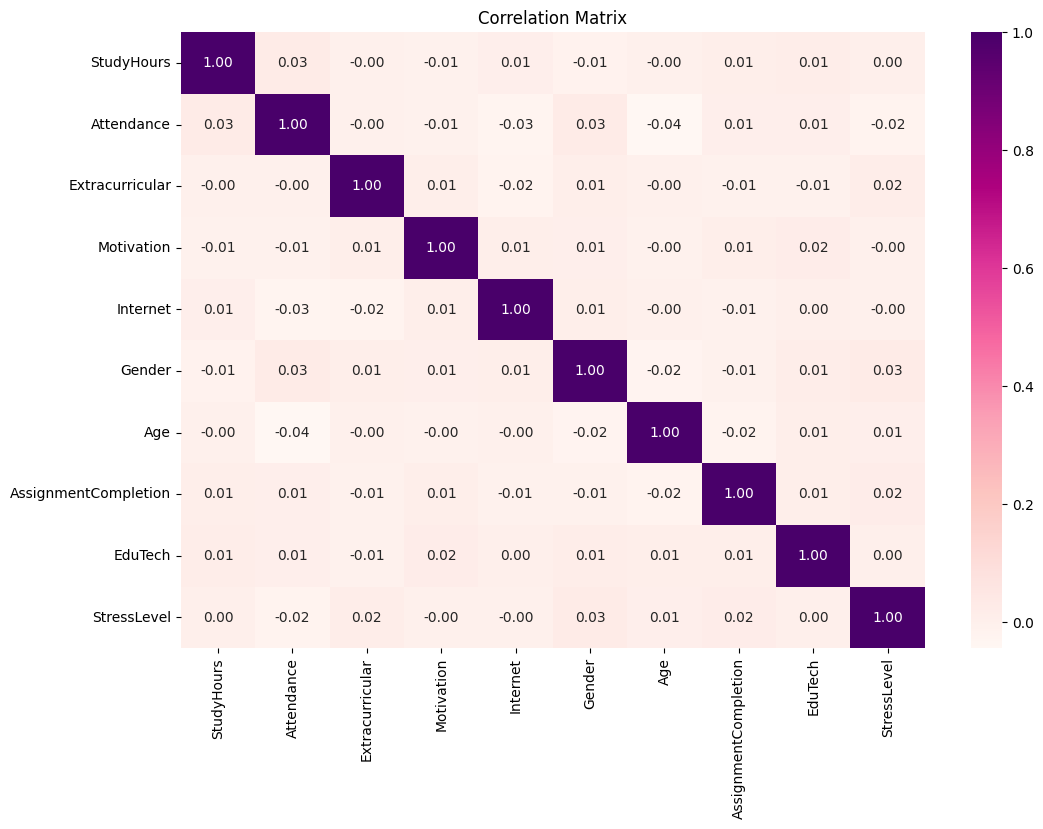

In [53]:
corr = df3[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Correlation Matrix")
plt.show()

## Data Quality Analysis

### Missing Value Analysis

In [54]:
df3.isnull().sum()

StudyHours              0
Attendance              0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
AssignmentCompletion    0
EduTech                 0
StressLevel             0
dtype: int64

### Outlier Analysis

In [55]:

outlier_count = []

for col in numerical_cols:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = ((df3[col] < lower) | (df3[col] > upper)).sum()
    
    outlier_count.append({
        "Column": col,
        "Number_of_Outliers": count
    })

iqr_outlier_df = pd.DataFrame(outlier_count)

iqr_outlier_df.sort_values("Number_of_Outliers", ascending=False)


,Column,Number_of_Outliers
4,Internet,1043
0,StudyHours,45
1,Attendance,0
2,Extracurricular,0
3,Motivation,0
5,Gender,0
6,Age,0
7,AssignmentCompletion,0
8,EduTech,0
9,StressLevel,0


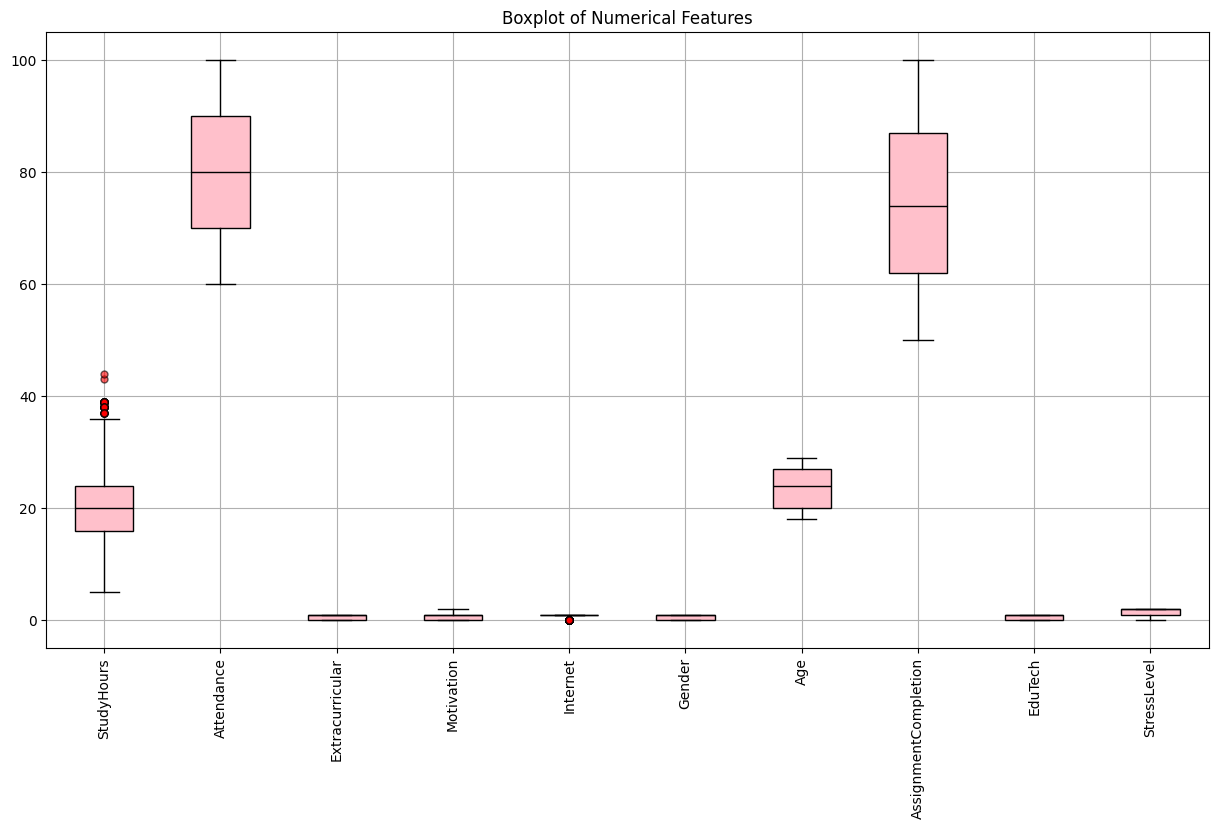

In [56]:
plt.figure(figsize=(15, 8))

df3[numerical_cols].boxplot(
    rot=90,
    patch_artist=True,
    boxprops=dict(facecolor='pink', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.6)
)

plt.title("Boxplot of Numerical Features")
plt.show()


### Duplicate Data Analysis

In [57]:
duplicate_rows = df3.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 3413


# Data Preprocessing

## Handle Duplicate Data

In [58]:
# Keep first occurrence (default)
df3 = df3.drop_duplicates(keep='first')

duplicate_rows = df3.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


## Outlier Handling

In [59]:
# --- Outliers BEFORE cleaning ---
Q1 = df3[numerical_cols].quantile(0.25)
Q3 = df3[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_before = ((df3[numerical_cols] < lower) | (df3[numerical_cols] > upper)).sum()

# --- Clip the outliers (IQR method) ---
for col in numerical_cols:
    df3[col] = np.clip(df3[col], lower[col], upper[col])

# --- Outliers AFTER cleaning ---
outliers_after = ((df3[numerical_cols] < lower) | (df3[numerical_cols] > upper)).sum()

# --- Comparison table ---
outlier_comparison = pd.DataFrame({
    'Before': outliers_before,
    'After': outliers_after
})

outlier_comparison


,Before,After
StudyHours,38,0
Attendance,0,0
Extracurricular,0,0
Motivation,0,0
Internet,1025,0
Gender,0,0
Age,0,0
AssignmentCompletion,0,0
EduTech,0,0
StressLevel,0,0


# Clustering Model

In [60]:
def analyze_clusters(df, cluster_labels, feature_columns):
    df_with_clusters = df3.copy()
    df_with_clusters['Cluster'] = cluster_labels
    
    # Calculate cluster statistics
    cluster_stats = df_with_clusters.groupby('Cluster')[feature_columns].agg(['mean', 'std'])
    
    print("=== CLUSTER ANALYSIS ===")
    print("\nCluster Statistics:")
    print(cluster_stats.round(3))
    
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    print(f"\nCluster Sizes:")
    for cluster_id, size in cluster_sizes.items():
        print(f"Cluster {cluster_id}: {size} students")
    
    cluster_labels_dict = {}
    
    for cluster_id in range(len(cluster_stats)):
        print(f"\n--- CLUSTER {cluster_id} ANALYSIS ---")
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
        
        cluster_means = cluster_data[feature_columns].mean()
        print("Average characteristics:")
        for feature in feature_columns:
            print(f"  {feature}: {cluster_means[feature]:.3f}")
        
        study_hours = cluster_means['StudyHours']
        attendance = cluster_means['Attendance']
        motivation = cluster_means['Motivation']
        stress_level = cluster_means['StressLevel']
        assignmentCompletion = cluster_means['AssignmentComepletion']
        
        if assignmentCompletion >= 80 and study_hours <= 25 and attendance >= 85:
            cluster_labels_dict[cluster_id] = "Efficient Achievers"
        elif study_hours >= 30 and attendance >= 80 and motivation >= 1:
            cluster_labels_dict[cluster_id] = "Busy Learners"
        elif assignmentCompletion >= 70 and stress_level <= 1:
            cluster_labels_dict[cluster_id] = "Balanced Performers"
        elif study_hours <= 20 and assignmentCompletion <= 60:
            cluster_labels_dict[cluster_id] = "Underperformers"
        elif stress_level >= 2 and assignmentCompletion >= 60:
            cluster_labels_dict[cluster_id] = "Stressed Achievers"
        else:
            cluster_labels_dict[cluster_id] = "Mixed Learners"
    
    print("\n=== CLUSTER LABELS ===")
    for cluster_id, label in cluster_labels_dict.items():
        print(f"Cluster {cluster_id}: {label}")
        
    return cluster_labels_dict, cluster_stats

In [66]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 1. Prepare Data
# Assuming df3 is already defined as per your snippet
features = ['StudyHours', 'Attendance', 'AssignmentCompletion', 'StressLevel']

X = df3[features]

# Scale the data (Crucial for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define Evaluation Loop
results = []
cluster_range = range(2, 7) # Trying 2 to 6 clusters

print("Evaluating models... (This may take a moment)")

for k in cluster_range:
    # --- Model A: K-Means ---
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X_scaled)
    
    # --- Model B: Gaussian Mixture Model (GMM) ---
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels_gmm = gmm.fit_predict(X_scaled)
    
    # Add metrics for K-Means
    results.append({
        'Model': 'K-Means',
        'Clusters': k,
        'Silhouette': silhouette_score(X_scaled, labels_km),
        'Calinski_Harabasz': calinski_harabasz_score(X_scaled, labels_km),
        'Davies_Bouldin': davies_bouldin_score(X_scaled, labels_km)
    })
    
    # Add metrics for GMM
    results.append({
        'Model': 'GMM',
        'Clusters': k,
        'Silhouette': silhouette_score(X_scaled, labels_gmm),
        'Calinski_Harabasz': calinski_harabasz_score(X_scaled, labels_gmm),
        'Davies_Bouldin': davies_bouldin_score(X_scaled, labels_gmm)
    })

# 3. Create Ranking Table
df_results = pd.DataFrame(results)

# Sorting logic: Higher Silhouette and Calinski-Harabasz are better. 
# Lower Davies-Bouldin is better.
# We rank primarily by Silhouette Score.
df_results['Rank'] = df_results['Silhouette'].rank(ascending=False)
df_results = df_results.sort_values(by='Rank').reset_index(drop=True)

print("\n=== CLUSTERING MODEL RANKING ===")
print(df_results[['Rank', 'Model', 'Clusters', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin']])

# 4. Extract the Best Model Parameters
best_model_info = df_results.iloc[0]
print(f"\nBest Model Recommended: {best_model_info['Model']} with {int(best_model_info['Clusters'])} clusters.")

# 5. Apply the Best Model to your Original Dataframe
if best_model_info['Model'] == 'K-Means':
    final_model = KMeans(n_clusters=int(best_model_info['Clusters']), random_state=42, n_init=10)
else:
    final_model = GaussianMixture(n_components=int(best_model_info['Clusters']), random_state=42)

df3['Cluster'] = final_model.fit_predict(X_scaled)

Evaluating models... (This may take a moment)

=== CLUSTERING MODEL RANKING ===
   Rank    Model  Clusters  Silhouette  Calinski_Harabasz  Davies_Bouldin
0   1.5  K-Means         2    0.204998        2676.170168        1.903590
1   1.5      GMM         2    0.204998        2676.170168        1.903590
2   3.0  K-Means         5    0.203862        2471.925764        1.284808
3   4.0  K-Means         4    0.201708        2516.640829        1.425569
4   5.0      GMM         4    0.198665        2479.160498        1.466301
5   6.0  K-Means         6    0.195402        2357.040385        1.281490
6   7.0  K-Means         3    0.194830        2514.207627        1.638643
7   8.0      GMM         3    0.194292        2485.693644        1.676608
8   9.0      GMM         5    0.185067        2326.340107        1.484649
9  10.0      GMM         6    0.182022        2225.261998        1.353481

Best Model Recommended: K-Means with 2 clusters.
